In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import yfinance as yf 
import datetime as dt 
import pandas as pd 
import numpy as np 

yf.pdr_override()
%matplotlib inline

## Define the names of the sectors

In [2]:
#out = [(i, yf.Ticker(i.upper()).info['longName']) for i in sectors]
names = {'xly': 'Consumer Discretionary',
        'igv': 'iShares Expanded Tech-Software Sector ETF',
        'fdn': 'First Trust Dow Jones Internet Index Fund',
        'xlre': 'The Real Estate',
        'xlk': 'Technology',
        'xrt': 'SPDR S&P Retail ETF',
        'jets': 'U.S. Global Jets ETF',
        'tan': 'Invesco Solar ETF',
        'xlv': 'Health Care',
        'smh': 'VanEck Semiconductor ETF',
        'ibb': 'iShares Biotechnology ETF',
        'xlu': 'Utilities',
        'itb': 'iShares U.S. Home Construction ETF',
        'xlp': 'Consumer Staples',
        'xlc': 'Communication Services',
        'pho': 'Invesco Water Resources ETF',
        'xli': 'Industrial',
        'xlf': 'Financials',
        'xlb': 'Materials',
        'moo': 'VanEck Agribusiness ETF',
        'pbw': 'Invesco WilderHill Clean Energy ETF',
        'xme': 'SPDR S&P Metals and Mining ETF',
        'xle': 'Energy',
        'gdx': 'VanEck Gold Miners ETF',
        'spy': 'SPYDR S&P 500 ETF',
        'tlt': 'iShares 20+ yr Bond ETF',
        'lqd': 'Invesment grade corporate bond etf',
        'weat': 'Wheat ETF',
        'corn': 'Corn ETF',
        'bito': 'Bitcoin', 
        'uup': 'US Dollar Index'}

short_names = {
        'XLY': 'ConsumerDiscretionary',
        'IGV': 'Tech-Software Sector',
        'FDN': 'DowJonesInternet',
        'XLRE': 'RealEstate',
        'XLK': 'Technology',
        'XRT': 'SPDR S&P Retail',
        'JETS': 'Airlines',
        'TAN': 'Solar',
        'XLV': 'HealthCare',
        'SMH': 'Semiconductor',
        'IBB': 'Biotechnology',
        'XLU': 'Utilities',
        'ITB': 'Home Construction',
        'XLP': 'Consumer Staples',
        'XLC': 'Communication Services',
        'PHO': 'Water Resources',
        'XLI': 'Industrial',
        'XLF': 'Financials',
        'XLB': 'Materials',
        'MOO': 'VanEck Agribusiness',
        'PBW': 'WilderHill Clean Energy',
        'XME': 'SPDR S&P Metals and Mining',
        'XLE': 'Energy',
        'GDX': 'VanEck Gold Miners',
        'WEAT':'Wheat',
        'CORN': 'Corn',
        'LQD': 'CorperateBonds',
        'TLT': '20+ yr Bonds',
        'BITO': 'Bitcoin',
        'UUP': 'US Dollar'
        }


In [3]:
sectors_txt = "xly igv fdn xlre xlk xrt jets tan xlv smh ibb xlu itb xlp xlc pho xli xlf xlb moo pbw xme xle gdx lqd spy tlt weat corn bito uup"
sectors = sectors_txt.split(' ')

In [4]:
print(sectors)

['xly', 'igv', 'fdn', 'xlre', 'xlk', 'xrt', 'jets', 'tan', 'xlv', 'smh', 'ibb', 'xlu', 'itb', 'xlp', 'xlc', 'pho', 'xli', 'xlf', 'xlb', 'moo', 'pbw', 'xme', 'xle', 'gdx', 'lqd', 'spy', 'tlt', 'weat', 'corn', 'bito', 'uup']


In [5]:
todays_date = dt.datetime.today().strftime('%Y-%m-%d')
data = yf.download(sectors,start='2000-01-01', end = todays_date)
data.index = data.index.strftime('%Y-%m-%d')
data.columns.names = ['Info', 'Ticker']
data.tail()

[*********************100%***********************]  31 of 31 completed


Info        Adj Close                                                \
Ticker           BITO       CORN         FDN        GDX         IBB   
Date                                                                  
2024-08-27  18.886551  17.360001  202.210007  39.220001  147.869995   
2024-08-28  17.884638  17.250000  199.740005  38.360001  147.779999   
2024-08-29  17.987637  17.469999  201.410004  38.880001  148.279999   
2024-08-30  17.791000  17.700001  202.899994  38.619999  148.169998   
2024-09-03  17.590000  17.959999  198.039993  37.270000  145.660004   

Info                                                                 ...  \
Ticker            IGV         ITB       JETS         LQD        MOO  ...   
Date                                                                 ...   
2024-08-27  86.320000  120.529999  18.379999  111.532341  73.169998  ...   
2024-08-28  85.250000  119.940002  18.219999  111.303177  73.089996  ...   
2024-08-29  86.290001  119.529999  18.440001  111.113861  73.360001  ...   
2024-08-30  86.800003  120.980003  18.700001  110.804993  73.550003  ...   
2024-09-03  84.900002  117.720001  18.440001  111.139999  72.269997  ...   

Info          Volume                                                   \
Ticker           XLF      XLI      XLK       XLP       XLRE       XLU   
Date                                                                    
2024-08-27  21583500  4000900  3828000   5674600  3717600.0   8333400   
2024-08-28  24726200  4336300  4501100   6666800  5035000.0   5241400   
2024-08-29  33726600  8226000  6657400   6343700  5339900.0   6379100   
2024-08-30  28967700  8347900  5024200   8884800  5611600.0   8503700   
2024-09-03  39864500  9332000  7376400  15501200  7573800.0  11813000   

Info                                                
Ticker          XLV      XLY        XME        XRT  
Date                                                
2024-08-27  3785400  1664100   707800.0  2501000.0  
2024-08-28  5150100  2834300  1491800.0  5354300.0  
2024-08-29  4339200  2308000  1311900.0  5513300.0  
2024-08-30  7020600  2336100  1339100.0  3832500.0  
2024-09-03  7674100  4938200  3621000.0  4564800.0  

[5 rows x 186 columns]

In [6]:
print(len(data))
set(data.columns.get_level_values(0))
data.xs(key = 'XLB', axis = 1, level = 1).index

6206


Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26',
       '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03'],
      dtype='object', name='Date', length=6206)

In [7]:
import pandas as pd
def add_stock_price(symbol):
    df = data.xs(symbol.upper(), axis = 1, level = 1)
    df.index = pd.to_datetime(df.index)
    return df

# Reduce weekly, monthly, quarter, yearly etc.
def reduce_df(stock_prices, period = 'W'):
    stock_prices.index == pd.DatetimeIndex(stock_prices.index)
    """Availible options for period: W, M, Q, Y, aggregate 2 weeks, months, etc. with '2W'.. etc"""
    df = stock_prices.copy()
    df = df.resample(period).agg({
        'Open': lambda s: s[0],
        'High': lambda df: df.max(),
        'Low': lambda df: df.min(),
        'Close': lambda df: df[-1],
        'Volume': lambda df: df.sum()})
    return df

In [8]:
lod = {x: add_stock_price(x) for x in sectors}

<Axes: title={'center': 'Returns for SPYDR S&P 500 ETF'}, xlabel='Date'>

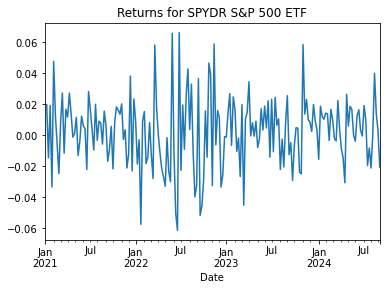

In [10]:
sym = 'spy'
temp_df = reduce_df(lod[sym])
temp_df.loc['2021-01-01':,'Close'].pct_change().plot(title = f'Returns for {names[sym]}')

In [11]:
Close_df = data['Close'].dropna()
Close_df.index = pd.DatetimeIndex(Close_df.index)

weekly_ret = Close_df.resample('W').agg(lambda x: (x[-1] - x[0]) / x[0])
monthly_ret = Close_df.resample('M').agg(lambda x: (x[-1] - x[0]) / x[0])
annual_ret = Close_df.resample('Y').agg(lambda x: (x[-1] - x[0]) / x[0])

In [12]:
#[(x,y) for x,y in names.items()]

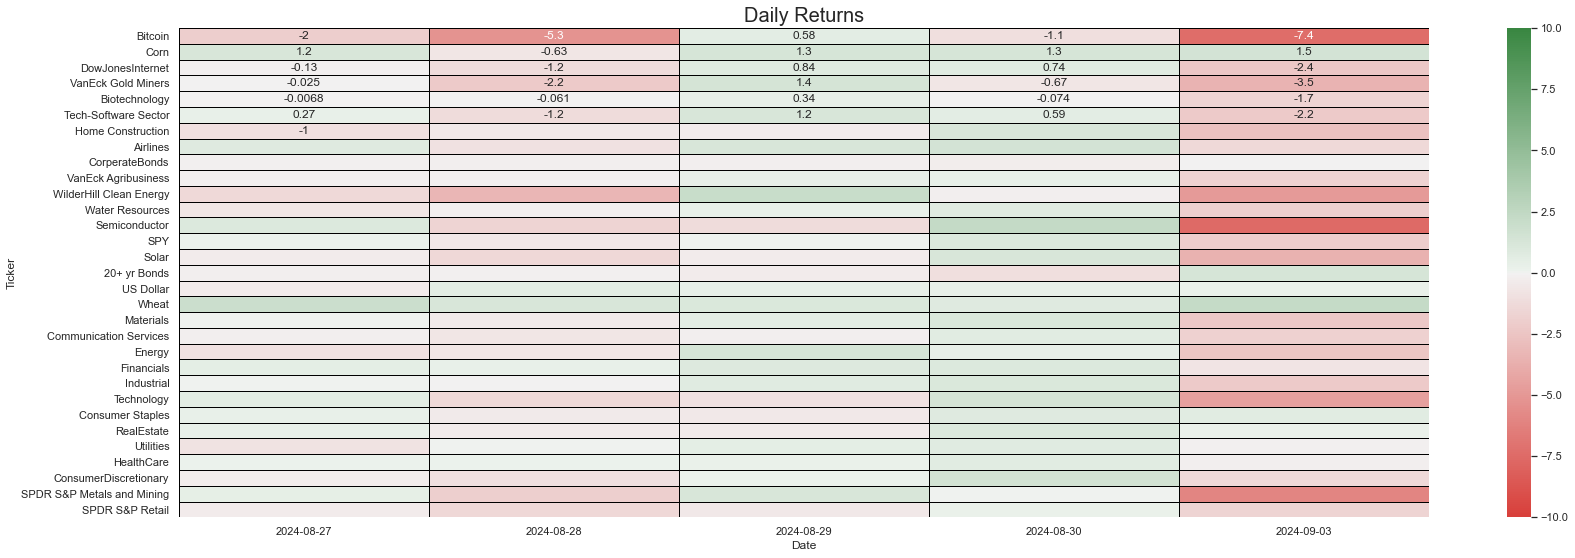

In [14]:
def heat_map(pdf, agg = 'W'):
    pdf.index = pd.DatetimeIndex(pdf.index)
    if agg == 'D':
        df = pdf.pct_change()
    else:
        df = pdf.resample(agg).agg(lambda x: (x[-1] - x[0]) / x[0])
    pdf = pdf.iloc[-10:].copy()
    pdf.rename(columns = short_names, inplace = True)
    sns.set(rc = {'figure.figsize':(28,9)})
    color_map = sns.diverging_palette(13,130, as_cmap=True)
    hmap = sns.heatmap(pdf.T * 100 ,cmap= color_map , center = 0, annot = True,  vmin=-10, vmax=10, linewidths=1, linecolor='black').set_xticklabels([x.strftime('%Y-%m-%d') for x in pdf.index], rotation = 0)
    if agg == 'W':
        plt.title('Weekly Returns', fontsize = 20)
    elif agg == 'M':
        plt.title('Monthly Returns', fontsize = 20)
    elif agg == 'Y':
        plt.title('Annual Returns', fontsize = 20)
    elif agg == 'D':
        plt.title('Daily Returns', fontsize = 20)

    return hmap

pdf = Close_df.pct_change().tail()
pmap = heat_map(pdf, 'D')

<Axes: title={'center': 'Annual Returns'}, xlabel='Ticker'>

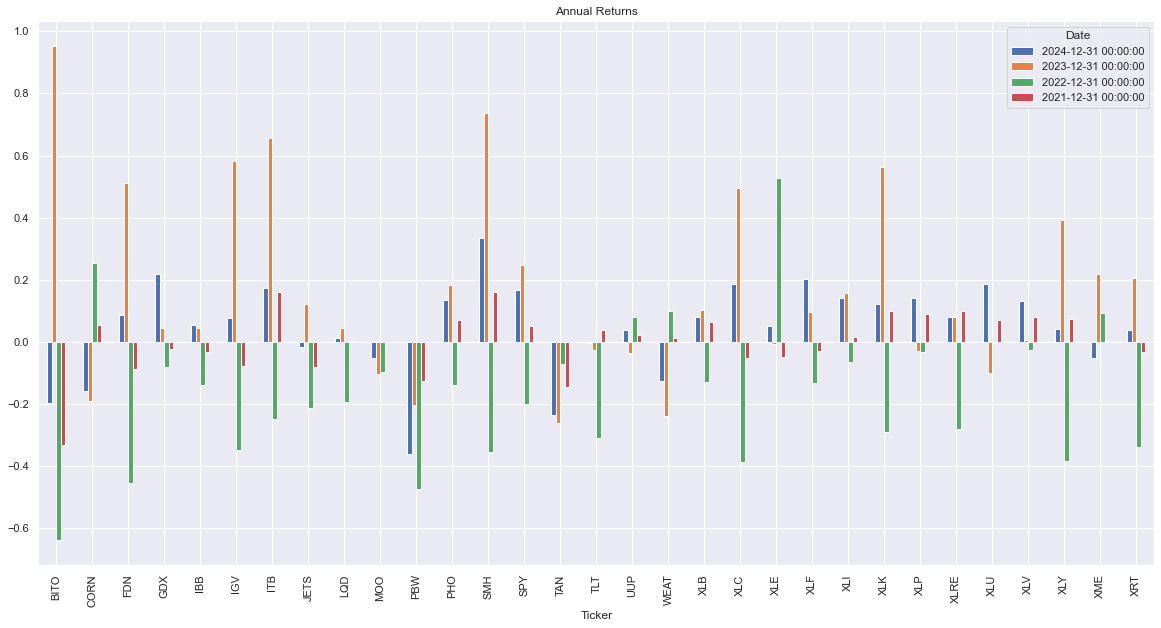

In [15]:
annual_ret.sort_index(ascending = False).head(10).T.plot(kind = 'bar', figsize = (20,10), title = 'Annual Returns')

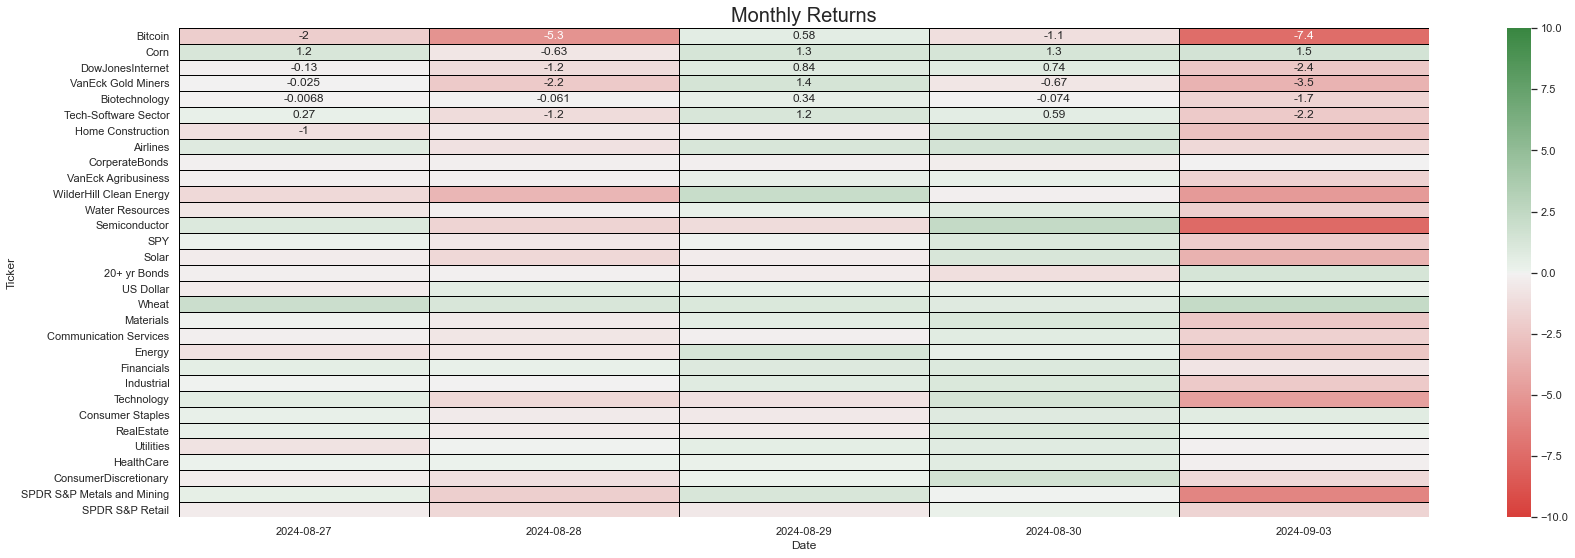

In [16]:
pmap = heat_map(pdf, 'M')

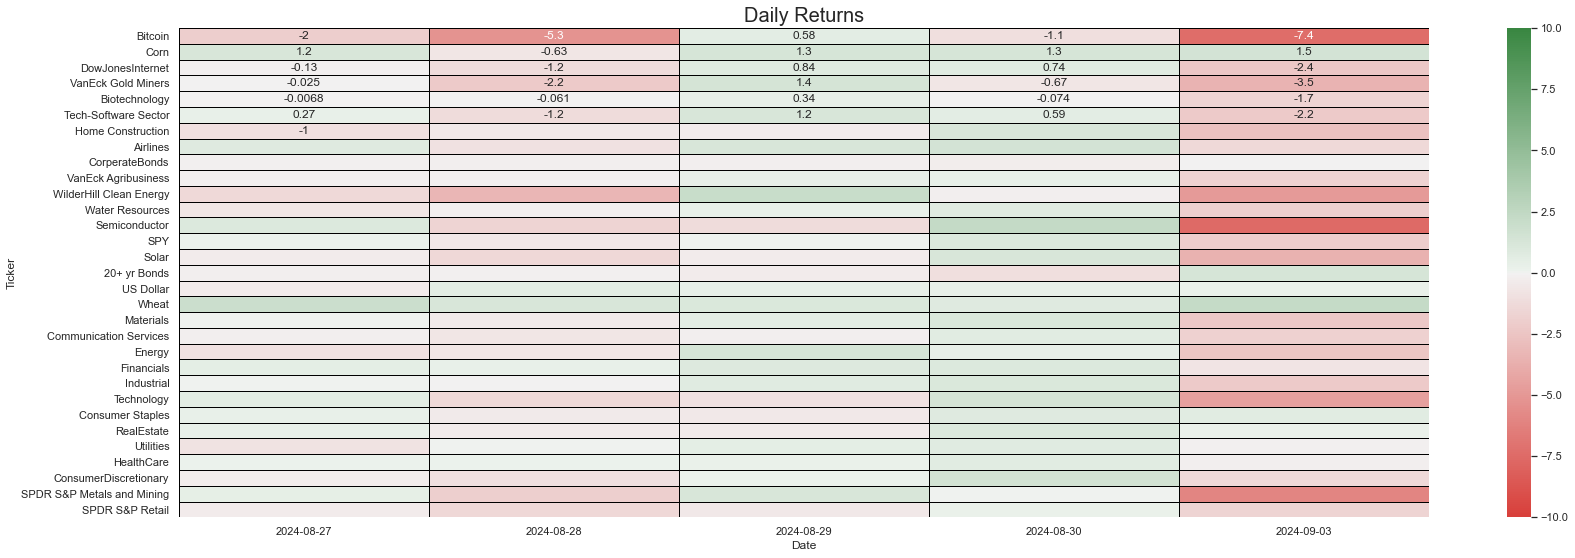

In [17]:
pmap = heat_map(pdf, 'D')

In [19]:
sdev_return = pd.concat([weekly_ret.std(axis = 0), monthly_ret.std(axis = 0),annual_ret.std(axis = 0)], axis = 1).head()
mean_return = pd.concat([weekly_ret.mean(axis = 0), monthly_ret.mean(axis = 0),annual_ret.mean(axis = 0)], axis = 1).head()
sdev_return.columns = ['Weekly', 'Monthly', 'Yearly']
mean_return.columns = ['Weekly', 'Monthly', 'Yearly']

# from dataFunctions import display_side_by_side

# display_side_by_side([mean_return, sdev_return], ['Mean', 'Standard Deviation'])

In [17]:
lor = {x:{'Daily':lod[x]['Close'].pct_change(),
        'Weekly':reduce_df(lod[x], period='W')['Close'].pct_change(),
        'Monthly':reduce_df(lod[x], period='M')['Close'].pct_change(),
        'Quarterly': reduce_df(lod[x], period='Q')['Close'].pct_change(),
        'Yearly':reduce_df(lod[x], period='Y')['Close'].pct_change()
        } for x in sectors}

def recent_performance(symbol, show_numbers = False):
    assert symbol in sectors 
    k = list(lor[symbol].keys())
    one_day_change = lor[symbol][k[0]].iloc[-1]
    one_week_change = lor[symbol][k[1]].iloc[-1]
    one_month_change = lor[symbol][k[2]].iloc[-1]
    one_quarter_change = lor[symbol][k[3]].iloc[-1]
    one_year_change = lor[symbol][k[4]].iloc[-1]
    if show_numbers == True:
        print(f'${symbol.upper()} Change:\nOne Day change: {one_day_change:.2%}\nOne Week: {one_week_change:.2%}\nOne Month: {one_month_change:.2%}\nOne quarter Change: {one_quarter_change:.4%}\nOne Year Change: {one_year_change:.4f}%')
    return {symbol:  {'Day':one_day_change,'Week':one_week_change,'Month':one_month_change,'Quarter':one_quarter_change,'Year':one_year_change}}

performance_list = []
# Append each performance to a list 
for i in sectors:
    performance_list.append(recent_performance(i))

# Create dataframe and populate
perf_df = pd.DataFrame(columns=['stock', 'daily', 'weekly', 'monthly', 'quarterly', 'yearly'])
for i in range(len(performance_list)):
    st = list(performance_list[i].keys())[0]
    perf_df.loc[i,'stock'] = st
    perf_df.loc[i,'daily'] = performance_list[i][st]['Day']
    perf_df.loc[i,'weekly'] = performance_list[i][st]['Week']
    perf_df.loc[i,'monthly'] = performance_list[i][st]['Month']
    perf_df.loc[i,'quarterly'] = performance_list[i][st]['Quarter']
    perf_df.loc[i,'yearly'] = performance_list[i][st]['Year']

perf_df.set_index('stock', inplace = True)



In [18]:
lodf = [pd.DataFrame(perf_df.loc['spy'])] + [pd.DataFrame(perf_df[x]).sort_values(x, ascending=False).head(10) for x in perf_df.columns] 
captions = ['Benchmark'] + perf_df.columns.to_list()
print('\t\t\t--------------------------- Top 10 stocks by Performance ---------------------------')
display_side_by_side(lodf, captions)

			--------------------------- Top 10 stocks by Performance ---------------------------


,spy
daily,0.005319
weekly,-0.016206
monthly,-0.014318
quarterly,0.047669
yearly,0.047669
,daily
stock,
smh,0.035434
xlk,0.016581
xle,0.015088


In [19]:
lodf = [pd.DataFrame(perf_df.loc['spy'])] + [pd.DataFrame(perf_df[x]).sort_values(x, ascending=True).head(10) for x in perf_df.columns] 
captions = ['Benchmark'] + perf_df.columns.to_list()
print('\t\t\t---------------- Bottom 10 Stocks by performance ----------------')
display_side_by_side(lodf, captions)

			---------------- Bottom 10 Stocks by performance ----------------


,spy
daily,0.005319
weekly,-0.016206
monthly,-0.014318
quarterly,0.047669
yearly,0.047669
,daily
stock,
corn,-0.016956
xme,-0.009486
xrt,-0.007182


In [20]:
perf_df.weekly.sort_values().head(5)

stock
xrt    -0.048996
gdx    -0.038719
bito   -0.037347
xme    -0.033464
ibb    -0.032693
Name: weekly, dtype: object